# Setting Up

In [ ]:
!nvidia-smi

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP train

/content/drive/MyDrive/Colab Notebooks/dokkho NLP test


# checkpoint

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/dokkho NLP test'

In [4]:
import pandas as pd
qdf = pd.read_csv('quote-nlp-dataset_cleaned.csv', encoding='utf-8', engine='python') #, on_bad_lines='skip', sep='delimiter')

In [5]:
qdf['tag_cat_list'].apply(type) # <class 'str'>
def string_to_list( string):
  clean_data = string.strip('\'')
  clean_data_to_list = eval(clean_data)
  return clean_data_to_list

qdf['tag_cat_list'] = qdf['tag_cat_list'].apply(string_to_list)
qdf['tag_cat_list'].apply(type) # <class 'list'> containing integers

0        <class 'list'>
1        <class 'list'>
2        <class 'list'>
3        <class 'list'>
4        <class 'list'>
              ...      
38555    <class 'list'>
38556    <class 'list'>
38557    <class 'list'>
38558    <class 'list'>
38559    <class 'list'>
Name: tag_cat_list, Length: 38560, dtype: object

# Dataloaders and Model config

In [6]:
with open('tag_types_encoded.json', 'r') as f:
  encode_data = json.load(f)
labels = list(encode_data.keys())   #(encode_tag_types.keys())

In [7]:
model_name = "roberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"
#hf_tokenizer = AutoTokenizer.from_pretrained("roberta-base")

In [8]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('quote'), get_y=ColReader('tag_cat_list'), splitter=RandomSplitter(valid_pct=0.2, seed=42)) #alid_pct=0.1

In [16]:
# dls = dblock.dataloaders(qdf, bs=32)
# torch.save(dls, "dataloaders/dls-multilabel-quote-classifier-2.pkl")
# #time benchmark:

In [9]:
dls = torch.load("dataloaders/dls-multilabel-quote-classifier-2.pkl")

In [18]:
# dls.vocab

['humor', 'philosophy', 'science', 'books', 'life', 'work', 'writing', 'religion', 'women', 'death', 'fear', 'reading', 'lies', 'truth', 'people', 'love', 'inspirational', 'Cassandra Clare', 'god', 'funny', 'humanity', 'wisdom', 'success', 'knowledge', 'happiness', 'faith', 'time', 'friendship', 'romance', 'peace', 'quotes', 'beauty', 'money', 'poetry', 'change', 'relationships', 'motivation', 'art', 'dreams', 'optimism', 'christianity', 'spirituality', 'mind', 'passion', 'life-lessons', 'inspiration', 'education', 'pain', 'failure', 'belief', 'life-and-living', 'reality', 'action', 'future', 'nature', 'living', 'positive', 'inspirational-life', 'inspirational-quotes', 'inspiring', 'forgive', 'courage', 'inspire', 'motivational', 'self-help', 'learning', 'leadership', 'hope', 'power', 'progress', 'freedom', 'loss', 'purpose', 'soul', 'goals', 'heart', 'inspirational-attitude', 'life-quotes', 'optimistic', 'positive-affirmation', 'positive-life', 'positive-thinking', 'Roy T. Bennett', '

In [20]:
# dls.show_batch(dataloaders=dls, max_n=6, trunc_at=512)

,text,target
0,...\n\n... موسی رو به نیل کرد، خیره به همان نیل، انگار با نیل صحبت می کند، بدون آن که رو به مردم بر گرداند، مردم را مخاطب قرار داد. یا مردمان! در این باد جهل که می وزد، از شما می خواهم خدای تان را دشنام نگوئید، و بوسه بر پای نا خدایان نزنید. من شما را از این آب عبور می دهم، در حالی که دوست داشتم بدانید اگر شما جثه و اندامی چونان پرندگان از عشق داشتید، شاید چوبدست شما نیز معجزات همتی می شد بر روی این موج خروشان... وآنگاه موسی چوبدست اش را بلند کرد، رو به سوی آسمان...,"[life, truth, inspirational, god, reality]"
1,"Let us fool ourselves no longer. At the very moment Western nations, threw off the ancient regime of absolute government, operating under a once-divine king, they were restoring this same system in a far more effective form in their technology, reintroducing coercions of a military character no less strict in the organization of a factory than in that of the new drilled, uniformed, and regimented army. During the transitional stages of the last two centuries, the ultimate tendency of this system might b e","[science, power]"
2,"I find that most people serve practical needs. They have an understanding of the difference between meaning and relevance. And at some level my mind is more interested in meaning than in relevance. That is similar to the mind of an artist. The arts are not life. They are not serving life. The arts are the cuckoo child of life. Because the meaning of life is to eat. You know, life is evolution and evolution is about eating. It's pretty gross if you think about it. Evolution is about getting eaten by monster","[science, art]"
3,"I look down at our knees, slightly touching. Jeans against jeans. Does she notice the heat transferring from her body to mine? Does she even realize what she's doing to me? I know, I know. I'm not a virgin and the slightest touch of a girl's knee is driving me insane. I don't even know what I'm feeling for Maggie, I just know that I'm feeling. It's something I've tried to avoid and deny until yesterday, when I held her in my arms while her tears spilled onto my shirt.\r\n\r\nGod, our knees touching isn't enoug","[love, romance]"
4,"I see things in windows and I say to myself that I want them. I want them because I want to belong. I want to be liked by more people, I want to be held in higher regard than others. I want to feel valued, so I say to myself to watch certain shows. I watch certain shows on the television so I can participate in dialogues and conversations and debates with people who want the same things I want. I want to dress a certain way so certain groups of people are forced to be attracted to me. I want to do my hair","[philosophy, life, religion, truth, love, freedom]"
5,"Haven't I? - he thought. Haven't I thought of it since the first time I saw you? Haven't I thought of nothing else for two years?...He sat motionless, looking at her. He heard the words he had never allowed himself to form, the words he had felt, known, yet had not faced, had hoped to destroy by never letting them be said within his own mind. Now it was as sudden and shocking as if he were saying it to her...Since the first time I saw you...Nothing but your body, that mouth of yours, and the way your eyes","[love, passion]"


In [ ]:
# doc(accuracy_multi)

In [10]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.5) #thresh=0.2

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()
#.to('cpu') #.to_fp16()

# Stage - 0

In [ ]:
# pth load
# learner.load('quote-classifier-bestonly') #try ('quote-classifier-bestonly', device='cpu') if no colab gpu

In [11]:
learner.freeze()

SuggestedLRs(slide=0.0010000000474974513, valley=0.00015848931798245758)

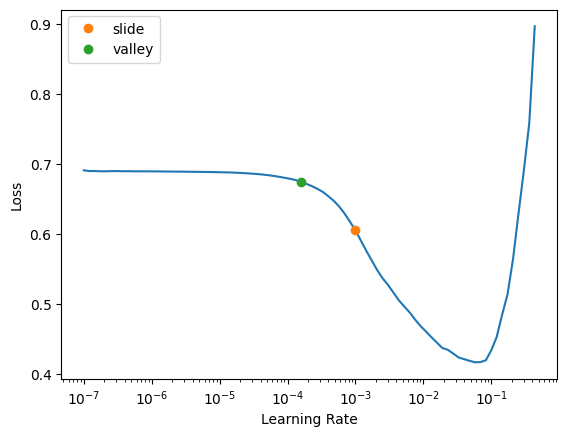

In [14]:
lr_finder = learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
# learning rates from the learner.lr_find() method in fastai. According to the web search results, you can do this by assigning the output of lr_find() to a variable,
# such as lrs, and then accessing the attributes lrs.slide and lrs.valley. For example:

# learn = cnn_learner(dls, resnet34, metrics=error_rate)
# lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
# lr_slide = lrs.slide lr_valley = lrs.valley

In [13]:
def slide_valley_midpoint(slide, valley):
  return (valley + slide)/2

In [ ]:
import random
optimal_val_loss = random.randrange(1000, 2001)  #learner.recorder.values[-1][2]

In [15]:
slide= lr_finder.slide #0.001000
valley= lr_finder.valley #0.0001584
learner.fit_one_cycle(1,lr_max = slide_valley_midpoint(slide,valley))#,
#cbs=SaveModelCallback(fname='quote-classifier-bestonly', monitor='valid_loss'))

val_loss = learner.recorder.values[-1][1]
if val_loss < optimal_val_loss:
    optimal_val_loss = val_loss
    learner.export("models/quote-classifier-stage-0.pkl")

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.083837,0.078187,0.978271,02:43


In [17]:
slide, valley, val_loss

(0.001, 0.0001584, 0.07818735390901566)

In [ ]:
slide=0.00301
valley=0.00022
learner.fit_one_cycle(2,lr_max = slide_valley_midpoint(slide,valley))#,
#cbs=SaveModelCallback(fname='quote-classifier-bestonly', monitor='valid_loss'))

val_loss = learner.recorder.values[-1][2]
if val_loss < optimal_val_loss:
  learner.export("models/quote-classifier-stage-0.pkl")

In [ ]:
#learner.save("quote-classifier-stage-0") #.pth

In [29]:
learner.export("models/quote-classifier-0.5freeze-working.pkl")

# Stage - 1

In [ ]:
# learner.load("quote-classifier-stage-0")

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.005248074419796467, valley=1.737800812406931e-05)

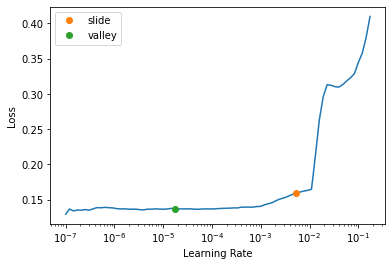

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
slide=0.00301
valley=0.00022
learner.fit_one_cycle( 2, lr_max = slide_valley_midpoint(slide,valley),
cbs=SaveModelCallback(fname='quote-classifier-bestonly', monitor='valid_loss'))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.145752,0.139841,0.935333,00:44
1,0.124982,0.126526,0.942088,00:44
2,0.111108,0.121283,0.945681,00:44


In [27]:
learner.save("quote-classifier-working")

Path('models/quote-classifier-working.pth')

In [ ]:
learner.export("models/book-classifier-stage-1.pkl")

# String test: IRL input inference

In [19]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)
train_ids, valid_ids = splitter(qdf)
len(train_ids), len(valid_ids)

(30848, 7712)

In [21]:
valid_df = qdf.loc[valid_ids]
valid_df.tail(20)

,attirbuted author,quote,quote_info_list,quote_info_list_w_author,revised_quote_info,tag_cat_list
30585,Dejan Stojanovic,The world is God's salvation.,"['dejan-stojanovic', 'god', 'god-and-salvation', 'literature', 'philosophy', 'poetry', 'poets', 'quotes', 'salvation', 'the-sun-watches-the-sun', 'thoughts', 'world', 'Dejan Stojanovic']","['dejan-stojanovic', 'god', 'god-and-salvation', 'literature', 'philosophy', 'poetry', 'poets', 'quotes', 'salvation', 'the-sun-watches-the-sun', 'thoughts', 'world', 'Dejan Stojanovic']","['god', 'philosophy', 'poetry', 'quotes']","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
13399,Sylvia Plath,"Oh, something is there, waiting for me. Perhaps someday the revelation will burst in upon me and I will see the other side of this monumental grotesque joke. And then I'll laugh. And then I'll know what life is.","['life', 'Sylvia Plath']","['life', 'Sylvia Plath']",['life'],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1918,George Carlin,"So, have a little fun. Soon enough you'll be dead and burning in Hell with the rest of your family.","['death', 'family', 'fun', 'hell', 'humor', 'George Carlin']","['death', 'family', 'fun', 'hell', 'humor', 'George Carlin']","['death', 'humor']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
21707,Anthony T. Hincks,Life stops when my universe ends.,"['anthony-t-hincks', 'ends', 'knowledge', 'quote-of-the-day', 'ross-veitch', 'thoughts', 'time', 'universe', 'wisdom', 'Anthony T. Hincks']","['anthony-t-hincks', 'ends', 'knowledge', 'quote-of-the-day', 'ross-veitch', 'thoughts', 'time', 'universe', 'wisdom', 'Anthony T. Hincks']","['knowledge', 'time', 'wisdom']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
23597,Yevgeny Zamyatin,You are afraid of it because it is stronger than you; you hate it because you are afraid of it; you love it because you cannot subdue it to your will. Only the unsubduable can be loved.,"['love', 'Yevgeny Zamyatin']","['love', 'Yevgeny Zamyatin']",['love'],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
8275,Stanley Hauerwas,"The cross is not a sign of the church's quiet, suffering submission to the powers-that-be, but rather the church's revolutionary participation in the victory of Christ over those powers. The cross is not a symbol for general human suffering and oppression. Rather, the cross is a sign of what happens when one takes God's account of reality more seriously than Caesar's. The cross stands as God's (and our) eternal no to the powers of death, as well as God's eternal yes to humanity, God's remarkable determination not to leave us to our own devices.","['death', 'jesus', 'the-cross', 'Stanley Hauerwas']","['death', 'jesus', 'the-cross', 'Stan

In [ ]:
model_path = "models/quote-classifier-0.5freeze-working.pkl" #quote-classifier.pkl"
learner_inf = load_learner(model_path)

In [22]:
test_quote = '''
Haven't I? - he thought. Haven't I thought of it since the first time I saw you? Haven't I thought of nothing else for two years?...He sat motionless, looking at her. He heard the words he had never allowed himself to form, the words he had felt, known, yet had not faced, had hoped to destroy by never letting them be said within his own mind. Now it was as sudden and shocking as if he were saying it to her...Since the first time I saw you...Nothing but your body, that mouth of yours, and the way your eyes
''' # in validation dataset output: [love , passion]

In [23]:
learner.blurr_predict(test_quote)[0]['labels'] #learner_inf

['love']

In [ ]:
learner.blurr_predict(test_quote)#("random placeholder")

[{'labels': [],
  'scores': [],
  'class_indices': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'class_labels': ['humor', 'philosophy', 'science', 'books', 'life', 'work', 'writing', 'religion', 'women', 'death', 'fear', 'reading', 'lies', 'truth', 'people', 'love', 'inspirational', 'Cassandra Clare', 'god', 'funny', 'humanity', 'wisdom', 'success', 'knowledge', 'happiness', 'faith', 'time', 'friendship', 'romance', 'peace